In [1]:
import uqtestfuns as uqtf
import matplotlib.pyplot as plt
import numpy as np

(prob-input:univariate-distributions:exponential)=
# Exponential Distribution

The exponential distribution is a single-parameter continuous probability
distribution.

The table below summarizes some important aspects of the distribution.

|                      |                                                             |
|---------------------:|-------------------------------------------------------------|
|         **Notation** | $X \sim \mathcal{E}(\lambda)$                               |
|       **Parameters** | $\lambda \in \mathbb{R}_{>0}$ (rate parameter)              |
|  **{term}`Support`** | $\mathcal{D}_X = [0.0, \infty)$                             |
|      **{term}`PDF`** | $f_X (x; \lambda) = \lambda e^{-\lambda x}$                 |
|      **{term}`CDF`** | $F_X (x; \lambda) = 1 - e^{-\lambda x}$                     |
|     **{term}`ICDF`** | $F^{-1}_X (x; \lambda) = - \frac{1}{\lambda} \ln{(1 - x)}$  |

The plots of probability density functions (PDFs),
sample histogram (of $5'000$ points),
cumulative distribution functions (CDFs),
and inverse cumulative distribution functions (ICDFs) for different parameter
values are shown below.

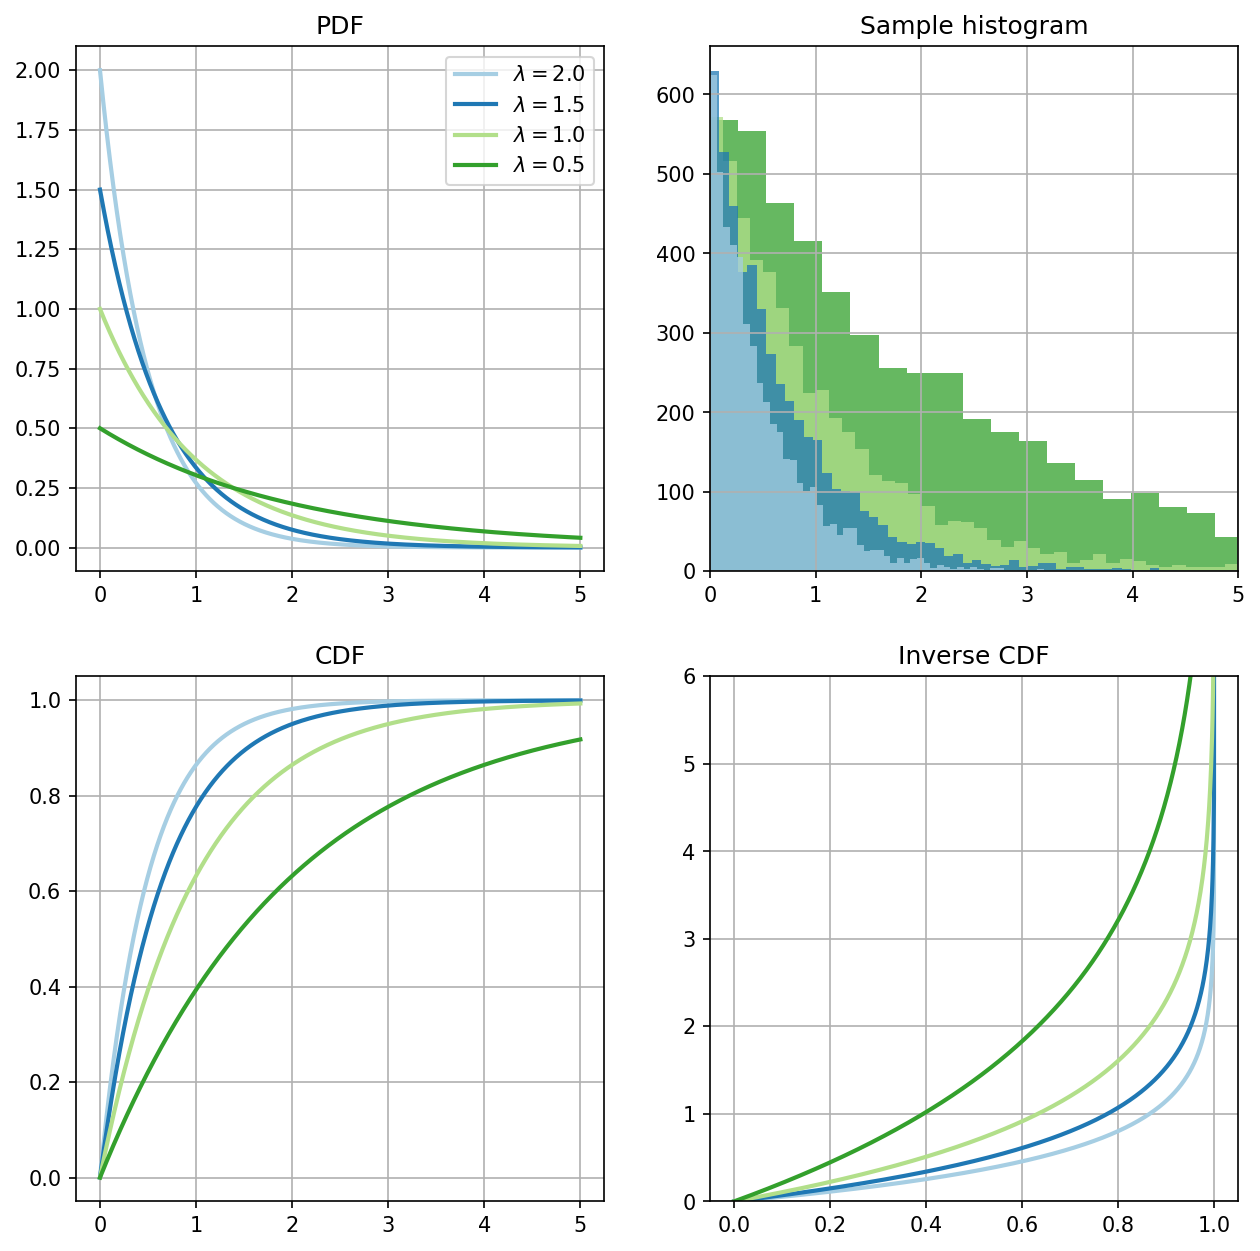

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

parameters = [[2.0], [1.5], [1.0], [0.5]]
colors = ["#a6cee3", "#1f78b4", "#b2df8a", "#33a02c"]

univ_dists = []
for parameter in parameters:
    univ_dists.append(uqtf.UnivDist(distribution="exponential", parameters=parameter))

fig, axs = plt.subplots(2, 2, figsize=(10,10))

# --- PDF
xx = np.linspace(0, 5, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[0, 0].plot(
        xx,
        univ_dist.pdf(xx),
        color=colors[i],
        label=f"$\\lambda = {univ_dist.parameters[0]}$",
        linewidth=2,
    )
axs[0, 0].legend();
axs[0, 0].grid();
axs[0, 0].set_title("PDF");

# --- Sample histogram
sample_size = 5000
np.random.seed(42)
for col, univ_dist in zip(reversed(colors), reversed(univ_dists)):
    axs[0, 1].hist(
        univ_dist.get_sample(sample_size),
        color=col,
        bins="auto",
        alpha=0.75
    )
axs[0, 1].grid();
axs[0, 1].set_xlim([0, 5]);
axs[0, 1].set_title("Sample histogram");

# --- CDF
xx = np.linspace(0, 5, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[1, 0].plot(
        xx,
        univ_dist.cdf(xx),
        color=colors[i],
        linewidth=2,
    )
axs[1, 0].grid();
axs[1, 0].set_title("CDF");

# --- Inverse CDF
xx = np.linspace(0, 1, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[1, 1].plot(
        xx,
        univ_dist.icdf(xx),
        color=colors[i],
        linewidth=2
    )
axs[1, 1].grid();
axs[1, 1].set_ylim([0, 6]);
axs[1, 1].set_title("Inverse CDF");

plt.gcf().set_dpi(150)